### 엔트로피

In [ ]:
# 엔트로피
# 다음과 같은 3종류의 확률분포가 있다고 하자.
# Y1 : P(Y=0)=0.5, P(Y=1)=0.5, Y2  : P(Y=0)=0.8, P(Y=1)=0.2, Y3  : P(Y=0)=1.0, P(Y=1)=0.0
# Y1은 y값에 대해 아무것도 모르는 상태, Y2는 0이라 믿지만 1일수도 있는 상태, Y3는 y가 0이라고 확신하는 상태
# 확률분포가 가지는 이러한 차이를 하나의 숫자로 나타낸 것이 엔트로피.

# 엔트로피의 정의
# 확률분포가 가지는 정보의 확신도 혹은 정보량을 수치로 표현한것
# 확률분포에서 특정 값이 나올 확률이 높아지고 나머지 값의 확률은 낮아짐 > 엔트로피가 작아짐
# 반대로 여러가지 값이 나올 확률이 대부분 비슷한 경우 > 엔트로피가 높아짐
# 수학적으로 엔트로피는 확률분포함수를 입력으로 받아 숫자를 출력하는 범함수로 정의 H[]
# 이산확률변수의 경우 H[Y]=−∑k=1~K p(y_k)log_2 p(y_k)
# K: X가 가질 수 있는 클래스의 수 ,p(y): 확률질량함수
# 연속확률변수의 경우 H[Y]=−∫-∞~∞ p(y)log_2 p(y)dy
# 계산에서 p(y)=0인 경우는 로그값이 정의되지 않으므로 극한값을 사용 lim p→0 p*log_2 p=0
# 계산에서 확률값이 0인 경우는 가장 작은 값인 eps를 대신 사용
# 예의 Y3의 엔트로피를 계산해보면 eps=np.finfo(float).eps; -1*np.log2(1)-eps*np.log2(eps)

# 엔트로피의 성질
# 확률변수가 결정론적이면 확률분포에서 특정한 하나의 값이 나올 확률이 1임. 이 때 엔트로피는 0이 되고 이 값은 엔트로피가 가질수 있는 최소값.
# 반대로 엔트로피의 최대값은 이산 확률변수의 클래스 갯수에 따라 달라짐.
# 만약 이산확률분포가 가질 수 있는 값이 2^K개면 엔트로피의 최대값은 각 값에 대한 확률이 모두 같은 값인 1/2^K임.
# H=-2^K*(1/2^K)log2(1/2^K)=K

# 엔트로피의 추정
# 이론적 확률밀도함수가 없고 실제 데이터가 주어진 경우 데이터에서 확률질량함수를 추정한 후 이를 기반으로 엔트로피를 계산
# sp.stats.entropy(p,base=None) , p:확률질량함수값 , base=: 인수 개수

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


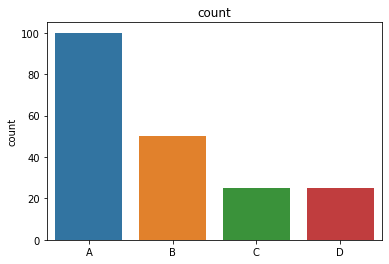

In [7]:
# 가변길이 인코딩
# 예시로 다음과 같은 문서가 있다고 생각
import numpy as np
N=200; p=[1/2,1/4,1/8,1/8]
doc0=list(''.join([int(N*p[i])*c for i,c in enumerate('ABCD')]))
np.random.shuffle(doc0)
doc=''.join(doc0); doc
# 이를 이진수로 변환해야 하면 보통 다음처럼 인코딩한다.
# A='00', B='01', C='10', D='11'
encoder={'A':'00','B':'01','C':'10','D':'11'}
encoded_doc=''.join([encoder[c] for c in doc]); len(encoded_doc)
# 여기서 400인 글자수를 줄이는 방법으로 먼저 분포를 조사함
import seaborn as sns; import matplotlib.pyplot as plt
sns.countplot(list(doc),order='ABCD'); plt.title('count'); plt.show()
# ABCD의 확률이 1/2,1/4,1/8,1/8이므로 A=0,B=10,C=110,D=111로 적용시 글자수를 줄일 수 있음
# 적용시 400>350으로 글자수가 유의미하게 줄어들음'
# 따라서 알파벳 한 글자를 인코딩하는데 필요한 평균 비트수는 350/200=1.75이고 이 값은 엔트로피값과 같음

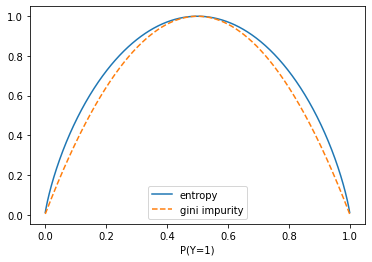

In [8]:
# 지니불순도
# 엔트로피처럼 확률분포가 어느쪽에 치우쳐있는가를 재는 척도
# 로그를 사용하지 않으므로 계산량이 더 적어 대용으로 사용됨.
# G[Y]=∑k=1~K P(y_k)(1−P(y_k))
# 값이 두개인 이산확률분포에서 지니불순도와 엔트로피의 비교
p0=np.linspace(0.001,1-0.001,1000); p1=1-p0
H=-p0*np.log2(p0)-p1*np.log2(p1); G=2*(p0*(1-p0)+p1*(1-p1))
plt.plot(p1,H,'-',label='entropy'); plt.plot(p1,G,'--',label='gini impurity')
plt.legend(); plt.xlabel('P(Y=1)'); plt.show()

# 엔트로피 최대화
# 기댓값=0, 분산=σ^2 이 주어졌을 때 엔트로피 H[p(x)]를 가장 크게 만드는 확률밀도함수 p(x)는 정규분포가 됨
# 확률밀도함수가 지켜야할 제한조건
# 총면적 1, ∫-∞~∞ p(x)dx=1,  기대값은 0 ∫-∞~∞ xp(x)dx=0, 분산은 σ^2 = ∫-∞~∞ x^2*p(x)dx
# 최대화할 목적범함수는 엔트로피. H[p(x)]=−∫-∞~∞ p(x)logp(x)dx
# 라그랑주 승수법 적용시 ∫-∞~∞ (−p(x)*logp(x)+λ1*p(x)+λ2*xp(x)+λ3*x^2*p(x)−λ1−λ3*σ^2)dx
# 도함수는 -logp(x)−1+λ1+λ2x+λ3x2=0 따라서 확률밀도함수는 p(−1+λ1+λ2x+λ3*x^2)
# 라그랑주 승수는 결과적으로 λ1=1−(1/2)log(2π*σ^2), λ2=0, λ3=−1/(2*σ^2) 이를 대응시키면 정규분포 식이 나옴
# 따라서 정규분포는 기댓값과 표준편차를 알고있는 확률분포 중에서 가장 엔트로피가 크고,
# 가장 정보가 적은 확률분포임.

### 조건부엔트로피

In [ ]:
# 결합엔트로피
# 결합확률분포를 사용하여 정의한 엔트로피
# H[X,Y]=−∑i=1~K_X ∑j=1~K_Y p(xi,yj)log_2 p(xi,yj)

# 조건부엔트로피
# 어떤 확률변수 X가 다른 확률변수 Y의 값을 예측하는데 도움이 되는지 측정하는 방법 중 하나.
# X값이 특정한 하나의 값을 가질 때 Y도 특정한 값을 가지면 예측가능
# X가 특정한 하나의 값을 가져도 Y가 여러 값으로 분포되어 있으면 예측도움x
# H[Y∣X=xi]=−∑j=1~K_Y p(yj∣xi)log2p(yj∣xi), H[Y∣X]=∑i=1~K_X p(xi)H[Y∣X=xi] > −∑i=1~K_X ∑j=1~K_Y p(xi,yj)log2p(yj∣xi)
# 연속확률변수의 경우 시그마 대신 인테그랄 쓰면됨(적분)

# 예측에 도움이 되는 경우
# p(x,y)가 P(0,0)=0.4, p(0,1)=0, p(1,0)=0, p(1,1)=0.6같은 형태의 경우

# 예측에 도움이 되지 않는 경우
# p(x,y)가 P(0,0)=1/9, p(0,1)=2/9, p(1,0)=2/9, p(1,1)=4/9같은 형태의 경우

# 조건부 엔트로피를 이용한 스팸메일 분류문제
# 80개의 메일중 정상매일 40개(Y=0), 스팸메일 40개(Y=1)이고 스팸메일인지 판단하는 키워드가 존재하는지(X=1), 혹은 없는지(X=0)여부.
# 키워드 후보로는 X1,X2,X3가 있음
# (x1,y)=[[30,10],[10,30]], (x2,y)=[[20,40],[20,0]], (x3,y)=[[0,40],[40,0]]
# 이렇게 있는 경우 당연히 x3가 가장 좋은 키워드임 조건부엔트로피값을 사용하면 해결가능 가장 작아지는 것이 좋은 키워드 일것.
# H[Y|Xi]=p(Xi=0)H[Y|Xi=0]+p(Xi=1)H[Y|Xi=1]
# 계산시 0.81, 0.69, 0이 나옴

### 교차엔트로피와 쿨백-라이블러 발산

In [ ]:
# 교차엔트로피
# 두 확률분포 p,q의 교차엔트로피 H[p,q]=−∑k=1~K p(yk)log2q(yk) = −∫y p(y)log2q(y)dy

# 교차엔트로피를 사용한 분류성능 측정
# 분류모형의 성능을 측정하는데 사용됨. 
# 예시로 p는 정답이 Y=1일때 p(Y=0)=0, p(Y=1)=1 이며 정답이 Y=0일때 p(Y=0)=1, p(Y=1)=0 이 된다.
# q는 X값이 정해졌을 때 예측값의 확률분포로 q(Y=0)=1−μ, q(Y=1)=μ
# 정답이 Y=1일때, H[p,q]=-p(Y=1)*log2q(Y=1)=-log2μ | 정답이 Y=0일때 H[p,q]= -log2(1-μ)
# 이 값은 분류성능이 좋을수록 작고, 나쁠수록 크다.
# 따라서 교차엔트로피값은 예측의 틀린정도를 나타내는 오차함수의 역할을 할 수 있다.
# N개의 데이터 전체에 대해 교차엔트로피의 평균 = 로그손실 = −1/N*∑i=1~N (yi*log2μi+(1−yi)*log2(1−μi))
# 이진분류가 아닌 다중분류에서의 교차엔트로피 손실함수 = 카테고리 로그손실 =−1/N*∑i=1~N ∑k=1~K (II(yi=k)log2p(yi=k))
# 여기서 II(yi=k)는 yi=k인 경우만 1이고 나머지는 0이 되는 지시함수임.
# log_loss 매서드로 계산가능 

# 쿨백-라이블러 발산
# 두 확률분포의 분포모양이 얼마나 다른지를 숫자로 계산한 값 = KL(p||q)= H[p,q]−H[p] = ∑i=1~K p(yi)log2(p(yi)/q(yi))
# 연속은 시그마 대신 적분
# 값은 항상 양수이며 두 확률분포가 완전히 같은 경우에만 0이 된다. 반대로 0이면 같은 확률분포임
# 이 값은 앞에 기준이 되는 확률분포에 대해 얼마나 다른지를 나타내므로 순서가 바뀌면 값이 일반적으로 달라진다.

# 가변길이 인코딩과 쿨백-라이블러 발산
# 솔직히 잘 이해안됨 하기도 싫고

### 상호정보량

In [9]:
# 상호정보량
# 두 확률변수 X,Y가 독립이면 정의에 의해 결합확률밀도함수는 주변확률밀도함수의 곱과 같음 p(x,y)=p(x)p(y)
# 결합밀도함수 p(x,y)와 주변밀도함수의 곱 p(x)p(y)의 쿨벡-라이블러 발산임.
# 즉 차이를 측정하므로써 두 확률변수의 상관관계를 측정. 상호정보량이 0이면 독립
# MI[X,Y]=KL(p(x,y)||p(x)p(y))=∑i=1~K p(xi,yi)log2(p(xi,yi)/(p(xi)p(yi)))
# 상호정보량은 엔트로피와 조건부엔트로피의 차이와 같음 MI[X,Y]=H[X]−H[X|Y] or MI[X,Y]=H[Y]−H[Y|X]

# 이산확률변수의 상호정보량
# MI[X,Y]=∑i=1~I ∑j=1~J Nij/N*log2((N*Nij)/(Ni*Nj))

# 최대정보 상관계수
# 연속확률변수의 표본데이터에서 확률분포함수를 알기위해 bin으로 나누어 측정하는데 bin의 개수나 경계위치에 따라 추정오차가 커짐
# 따라서 구간을 나누는 방법을 다양하게 시도후 그 결과로 구한 다양한 상호정보량 중 가장 큰 값을 선택하여 정규화한것.
# minepy패키지 이용 나중에 해봄